## Cavalli (MAGIC Cohort) Data Analysis and Integration with GSVA
Used for Figure 3

Author: Max Gold

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy import stats
import textwrap

### Import and process Cavalli Data

In [5]:
base_folder = '../data/'

In [6]:
## Import Dataset (samples x genes)

cav_df = pd.read_table(os.path.join(base_folder, 'cavalli_expression.txt'), index_col = 0)
cav_df.index = cav_df['HGNC_symbol_from_ensemblv77']
badcols = ['Description', 'EnsemblGeneID_from_ensemblv77', 'HGNC_symbol_from_ensemblv77', 'HGNC_ID_from_ensemblv77']
cav_df = cav_df.drop(badcols, axis=1)
cav_df = cav_df.groupby(cav_df.index).mean()
cav_df = cav_df.T


## Import Annotations
cav_ann = pd.read_excel(os.path.join(base_folder, 'cavalli_subtypes.xlsx'), index_col=0, skiprows=[0])
shh_cav_samps = list(cav_ann[cav_ann['Subgroup'] == 'SHH'].index)

/Users/maxgold/opt/anaconda3/envs/clean_v2/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Load and process GSVA data

In [8]:
## load data
kdf = pd.read_csv(os.path.join(base_folder, 'FINAL_GSVA_genesigs100.csv.gz'), index_col=0 )

## transpose and add combined features
nkdf = kdf.T
nkdf['GCP_progenitor'] = nkdf['MBEN-Nuc_GCP-Cycling'] + nkdf['MBEN-Nuc_GCP-SHH']
nkdf['GCP_diff'] = nkdf['MBEN-Nuc_GCP-Cycling'] - nkdf['MBEN-Nuc_GCP-SHH']
nkdf['GN-Late'] = nkdf['MBEN-Nuc_GN-Migrating'] + nkdf['MBEN-Nuc_GN-Postmigratory']

## join to Cavalli annotations
ankdf = nkdf.join(cav_ann, how='inner')

### Create Figure 3A

In [9]:
## Parameters
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']
cats = ['MBEN-Nuc_GCP-Cycling', 'MBEN-Nuc_GCP-SHH', 'MBEN-Nuc_GN-Premigratory', 'MBEN-Nuc_GN-Postmigratory']
gdict = {'SHH_beta': 'SHH-1 (SHH-{0})'.format('\N{greek small letter beta}'),
'SHH_gamma': 'SHH-2 (SHH-{0})'.format('\N{greek small letter gamma}'),
'SHH_alpha': 'SHH-3 (SHH-{0})'.format('\N{greek small letter alpha}'),
'SHH_delta': 'SHH-4 (SHH-{0})'.format('\N{greek small letter delta}'),}

ss = sorted(gdict.values())
## get small dataset of mean values for each subtype
hm = ankdf.groupby("Subtype").mean()[cats].copy()
hm = hm.loc[['SHH_beta', 'SHH_gamma','SHH_alpha', 'SHH_delta']]
## rename the index and columns
hm.index = ss
hm.columns = ['Cycling GCP', 'GCP', 'Premigratory GN', 'Postmigratory GN']

Text(0.5, 1.0, 'GN Dev Stage vs. SHH MB Subtype\n')

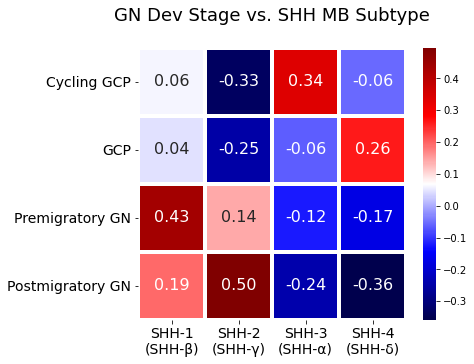

In [10]:
## make figure
plt.subplots(figsize=(6,5))
ax = sns.heatmap(hm.T, cmap='seismic', linewidths='4', annot=True, fmt='.2f', annot_kws={"fontsize":16})
plt.xticks(rotation=0)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.title("GN Dev Stage vs. SHH MB Subtype\n", fontsize=18)

## save figure
# plt.savefig("pdf_arial_figures/fig3a_trial_annot.pdf", dpi=300, bbox_inches='tight')

### collect mean data for groups compared to others

In [11]:
voo = ankdf.copy()
voo['alpha'] = [1 if x == 'SHH_alpha' else 0 for x in voo['Subtype']]
voo['beta'] = [1 if x == 'SHH_beta' else 0 for x in voo['Subtype']]
voo['gamma'] = [1 if x == 'SHH_gamma' else 0 for x in voo['Subtype']]
voo['delta'] = [1 if x == 'SHH_delta' else 0 for x in voo['Subtype']]

In [12]:
voo.groupby("alpha").mean()[['MBEN-Nuc_GCP-Cycling', 'MBEN-Nuc_GCP-SHH', 'MBEN-Nuc_GN-Premigratory', 'MBEN-Nuc_GN-Postmigratory']]

,MBEN-Nuc_GCP-Cycling,MBEN-Nuc_GCP-SHH,MBEN-Nuc_GN-Premigratory,MBEN-Nuc_GN-Postmigratory
alpha,,,,
0,-0.113083,0.062206,0.053521,0.018385
1,0.336150,-0.064404,-0.121847,-0.242992


In [13]:
voo.groupby("delta").mean()[['MBEN-Nuc_GCP-Cycling', 'MBEN-Nuc_GCP-SHH', 'MBEN-Nuc_GN-Premigratory', 'MBEN-Nuc_GN-Postmigratory']]

,MBEN-Nuc_GCP-Cycling,MBEN-Nuc_GCP-SHH,MBEN-Nuc_GN-Premigratory,MBEN-Nuc_GN-Postmigratory
delta,,,,
0,0.056143,-0.097059,0.094086,0.097328
1,-0.056190,0.261973,-0.174927,-0.357853


In [14]:
voo.groupby("beta").mean()[['MBEN-Nuc_GCP-Cycling', 'MBEN-Nuc_GCP-SHH', 'MBEN-Nuc_GN-Premigratory', 'MBEN-Nuc_GN-Postmigratory']]

,MBEN-Nuc_GCP-Cycling,MBEN-Nuc_GCP-SHH,MBEN-Nuc_GN-Premigratory,MBEN-Nuc_GN-Postmigratory
beta,,,,
0,0.010163,0.021649,-0.077876,-0.104677
1,0.059198,0.044919,0.433628,0.193990


In [15]:
voo.groupby("gamma").mean()[['MBEN-Nuc_GCP-Cycling', 'MBEN-Nuc_GCP-SHH', 'MBEN-Nuc_GN-Premigratory', 'MBEN-Nuc_GN-Postmigratory']]

,MBEN-Nuc_GCP-Cycling,MBEN-Nuc_GCP-SHH,MBEN-Nuc_GN-Premigratory,MBEN-Nuc_GN-Postmigratory
gamma,,,,
0,0.111655,0.098272,-0.034304,-0.205691
1,-0.333375,-0.247950,0.139867,0.496001


### Create Figure 3B

In [16]:
corrdf = nkdf.corr(method='pearson')

postrho = round(corrdf.loc['MBEN-Nuc_GN-Postmigratory','GCP_progenitor'], 2)
prerho = round(corrdf.loc['MBEN-Nuc_GN-Premigratory','GCP_progenitor'], 2)

## create modified annotated df
fff = ankdf.copy()
fff['Subtype'] = [gdict[x] for x in ankdf['Subtype']]

## set color scheme
cold = {'SHH-3 (SHH-α)': 'crimson', 'SHH-1 (SHH-β)': 'maroon','SHH-2 (SHH-γ)': 'rosybrown', 'SHH-4 (SHH-δ)': 'darksalmon'}
hud = [cold[x] for x in ss]

/Users/maxgold/opt/anaconda3/envs/clean_v2/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/maxgold/opt/anaconda3/envs/clean_v2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


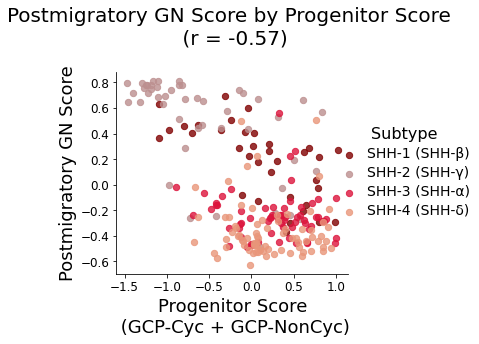

In [17]:
## Premigratory GN vs. Progenitor Score
g = sns.lmplot(data=fff, x='GCP_progenitor', y="MBEN-Nuc_GN-Postmigratory", hue='Subtype', fit_reg=False, hue_order=ss, 
               palette=hud, height=5, aspect=0.9, scatter_kws={"s": 40})
ax = plt.gca()
ax.set_ylabel('Postmigratory GN Score', fontsize=18)
ax.set_xlabel('Progenitor Score\n (GCP-Cyc + GCP-NonCyc)', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_title("Postmigratory GN Score by Progenitor Score \n ({0} = {1})\n".format('r', postrho), fontsize=20)
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=14)
g.tight_layout(pad=1.5)

# plt.savefig("../fig3b-postmig_trial.png", dpi=300, bbox_inches='tight')
# plt.savefig("pdf_arial_figures/fig3b-postmig_trial.pdf", dpi=300, bbox_inches='tight')

/Users/maxgold/opt/anaconda3/envs/clean_v2/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/maxgold/opt/anaconda3/envs/clean_v2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


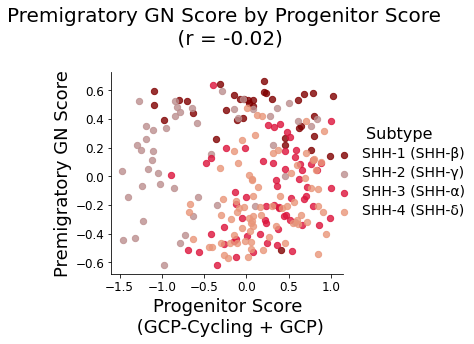

In [18]:
## Premigratory GN vs. Progenitor Score
g = sns.lmplot(data=fff, x='GCP_progenitor', y='MBEN-Nuc_GN-Premigratory', hue='Subtype', fit_reg=False, 
               hue_order=ss, palette=hud, height=5, aspect=0.9, scatter_kws={"s": 40})
ax = plt.gca()
ax.set_ylabel('Premigratory GN Score', fontsize=18)
ax.set_xlabel('Progenitor Score\n (GCP-Cycling + GCP)', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_title("Premigratory GN Score by Progenitor Score \n ({0} = {1})\n".format('r', prerho), fontsize=20)

plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=14)
g.tight_layout(pad=1.5)

# plt.savefig("pdf_arial_figures/fig3b-premig_trial.pdf", dpi=300, bbox_inches='tight')

### Calculate correlation values for other signatures

In [19]:
def get_correlations(file):
    vkdf = pd.read_csv(os.path.join(base_folder, file), index_col=0 )
    vkdf = vkdf.T
    vkdf['GCP_progenitor'] = vkdf['MBEN-Nuc_GCP-Cycling'] + vkdf['MBEN-Nuc_GCP-SHH']
    corrdf = vkdf.corr(method='pearson')
    postr = round(corrdf.loc['MBEN-Nuc_GN-Postmigratory','GCP_progenitor'], 2)
    prer = round(corrdf.loc['MBEN-Nuc_GN-Premigratory','GCP_progenitor'], 2)
    print(file, 'post', postr, 'pre', prer)
    
files = ['FINAL_GSVA_genesigs50.csv.gz', 'FINAL_GSVA_genesigs100.csv.gz','FINAL_GSVA_genesigs150.csv.gz','FINAL_GSVA_genesigs200.csv.gz']
for file in files:
    get_correlations(file)
    

FINAL_GSVA_genesigs50.csv.gz post -0.62 pre -0.03
FINAL_GSVA_genesigs100.csv.gz post -0.57 pre -0.02
FINAL_GSVA_genesigs150.csv.gz post -0.59 pre -0.01
FINAL_GSVA_genesigs200.csv.gz post -0.61 pre -0.06


### Genomic Mann Whitney for Gain or Loss

In [20]:
def run_mw_CNV(file):
    kdf = pd.read_csv(os.path.join(base_folder, file), index_col=0 )

    nkdf = kdf.T
    nkdf['GCP_progenitor'] = nkdf['MBEN-Nuc_GCP-Cycling'] + nkdf['MBEN-Nuc_GCP-SHH']
    nkdf['GCP_diff'] = nkdf['MBEN-Nuc_GCP-Cycling'] - nkdf['MBEN-Nuc_GCP-SHH']
    nkdf['GN-Late'] = nkdf['MBEN-Nuc_GN-Migrating'] + nkdf['MBEN-Nuc_GN-Postmigratory']

    ankdf = nkdf.join(cav_ann, how='inner')
    
    ## get the dataset of CNV values
    cnv = ankdf.iloc[:,-39:-1]
    ctn = [x for x in kdf.index if 'MBEN-Nuc' in x] + [ 'GCP_progenitor', 'GCP_diff', 'GN-Late']
    ct = ankdf[ctn]

    ctq = ct.columns

    cnvc = cnv.columns

    ull = []
    for cc in cnvc:
        dtf = ct.copy()
        cnvv = cnv[cc].values
        dtf['CNV'] = cnvv

        ## test gain vs. others
        if 1 in cnvv:
            gdf = dtf[dtf['CNV']==1].drop('CNV',axis=1)
            ngdf = dtf[dtf['CNV']!=1].drop('CNV',axis=1)
            for col in gdf.columns:
                gt = gdf[col]
                ngt = ngdf[col]
                u,p = stats.mannwhitneyu(gt, ngt)
                ull.append([col + '___' + cc + '___gain', u, p, np.mean(gt), np.mean(ngt)])
        
        ## test loss vs. others
        if -1 in cnvv:
            ldf = dtf[dtf['CNV']==-1].drop('CNV',axis=1)
            nldf = dtf[dtf['CNV']!=-1].drop('CNV',axis=1)
            for col in ldf.columns:
                gt = ldf[col]
                ngt = nldf[col]
                t,p = stats.mannwhitneyu(gt, ngt)
                ull.append([col + '___' + cc + '___loss', u, p, np.mean(gt), np.mean(ngt)])

    udf = pd.DataFrame(ull, columns = ['cat', 'U', 'p', 'mean_score_cat', 'mean_score_other'])    

    return udf

In [21]:
adfd = {}
for file in files:
    print(file)
    adf = run_mw_CNV(file)
    gs = file.split(".")[0].split("genesigs")[-1]
    adfd[gs] = adf.copy()
#     print(adf.dropna().sort_values('t').head(5))
#     print(adf.dropna().sort_values('t').tail(5))    
#     print('\n')

FINAL_GSVA_genesigs50.csv.gz
FINAL_GSVA_genesigs100.csv.gz
FINAL_GSVA_genesigs150.csv.gz
FINAL_GSVA_genesigs200.csv.gz


In [22]:
for k,adf in adfd.items():
    adf['cell_type'] = [x.split("__")[0] for x in adf['cat']]
    adf['chromosome']= [x.split("__")[1][1:] for x in adf['cat']]
    adf['gain/loss'] = [x.split("__")[2][1:] for x in adf['cat']]
#     adf.to_csv(k+'_geneset_sigs_mw.csv')

### Make chorosome plots

In [23]:
### create modified dataset to set up gains and losses

roo = ankdf.copy()

roo['Real10q'] = ['Loss' if x == -1 else 'WT/Gain' if (x in [0,1]) else np.nan for x in roo['10q']]
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']

roo['Real9q'] = ['Loss' if x == -1 else 'WT/Gain' if (x in [0,1]) else np.nan for x in roo['9q']]
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']

roo['Real11p'] = ['Loss' if x == -1 else 'WT/Gain' if (x in [0,1]) else np.nan for x in roo['11p']]
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']

roo['Real14q'] = ['Loss' if x == -1 else 'WT/Gain' if (x in [0,1]) else np.nan for x in roo['14q']]
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']

roo['Real3q'] = ['Gain' if x == 1 else 'WT/Loss' if (x in [0,-1]) else np.nan for x in roo['3q']]
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']

roo['Real22q'] = ['Loss' if x == -1 else 'WT/Gain' if (x in [0,1]) else np.nan for x in roo['22q']]
vorder = ['SHH_alpha', 'SHH_beta', 'SHH_gamma', 'SHH_delta']

roo['FullSubtype'] = [gdict[x] for x in roo['Subtype']]

#### 9q and late-GN

In [24]:
for subtype in roo['FullSubtype'].unique():
    troo = roo[(roo['FullSubtype']==subtype) & (roo['Real9q']=='Loss')]
    oroo = roo[(roo['FullSubtype']==subtype) & (roo['Real9q']=='WT/Gain')]
    u,p = stats.mannwhitneyu(troo['GN-Late'], oroo['GN-Late'])
    print(subtype, u, p)

SHH-1 (SHH-β) 86.0 0.9829998274969811
SHH-3 (SHH-α) 360.0 0.1545046383977782
SHH-2 (SHH-γ) 18.0 6.479487531980503e-06
SHH-4 (SHH-δ) 435.0 0.06946632836325287


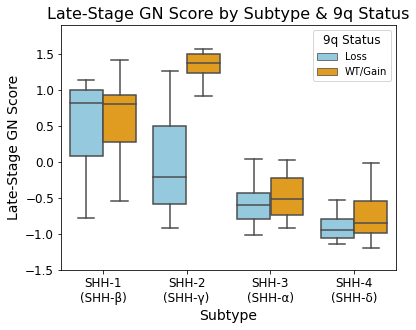

In [25]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='GN-Late', hue='Real9q',showfliers=False, hue_order=['Loss', 'WT/Gain'],  order = ss,  palette = ['skyblue', 'orange'])
ax.set_ylabel("Late-Stage GN Score", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Late-Stage GN Score by Subtype & 9q Status", fontsize=16)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-1.5, 1.9)

ax.legend(title='9q Status', loc=1, fontsize=10,  title_fontsize=12)
# plt.savefig("pdf_arial_figures/fig3d-9q.pdf", dpi=300, bbox_inches='tight')

In [26]:
for subtype in roo['FullSubtype'].unique():
    troo = roo[(roo['FullSubtype']==subtype) & (roo['Real10q']=='Loss')]
    oroo = roo[(roo['FullSubtype']==subtype) & (roo['Real10q']=='WT/Gain')]
    t,p = stats.mannwhitneyu(troo['GCP_diff'], oroo['GCP_diff'])
    print(subtype, u, p)

SHH-1 (SHH-β) 435.0 0.027490820375070845
SHH-3 (SHH-α) 435.0 0.0005865373806287464
SHH-2 (SHH-γ) 435.0 0.00900296556773118
SHH-4 (SHH-δ) 435.0 0.02607813394393002


(-1.3, 1.55)

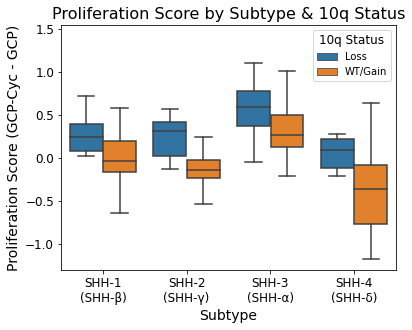

In [27]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='GCP_diff', hue='Real10q',showfliers=False, hue_order=['Loss', 'WT/Gain'],  order = ss)
ax.set_ylabel("Proliferation Score (GCP-Cyc - GCP)", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Proliferation Score by Subtype & 10q Status", fontsize=16)
ax.legend(title='10q Status', loc=1, fontsize=10,  title_fontsize=12)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-1.3, 1.55)

# plt.savefig("pdf_arial_figures/fig3c-10q.pdf", dpi=300, bbox_inches='tight')

#### 3Q and Progenitor

In [28]:
for subtype in roo['FullSubtype'].unique():
    troo = roo[(roo['FullSubtype']==subtype) & (roo['Real3q']=='Gain')]
    oroo = roo[(roo['FullSubtype']==subtype) & (roo['Real3q']=='WT/Loss')]
    t,p = stats.mannwhitneyu(troo['GCP_progenitor'], oroo['GCP_progenitor'])
    print(subtype, u, p)

SHH-1 (SHH-β) 435.0 0.15439470560192933
SHH-3 (SHH-α) 435.0 0.06503663683161698
SHH-2 (SHH-γ) 435.0 0.1276595744680851
SHH-4 (SHH-δ) 435.0 0.6059403506486751


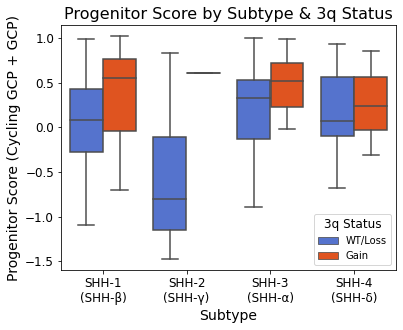

In [29]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='GCP_progenitor', hue='Real3q',showfliers=False, hue_order=['WT/Loss', 'Gain'],  order = ss, palette=['royalblue', 'orangered'])
ax.set_ylabel("Progenitor Score (Cycling GCP + GCP)", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Progenitor Score by Subtype & 3q Status", fontsize=16)
ax.legend(title='3q Status', loc=4, fontsize=10,  title_fontsize=12)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.savefig("../fig3se-3q.png", dpi=300, bbox_inches='tight')

#### 11p and premigratory GN

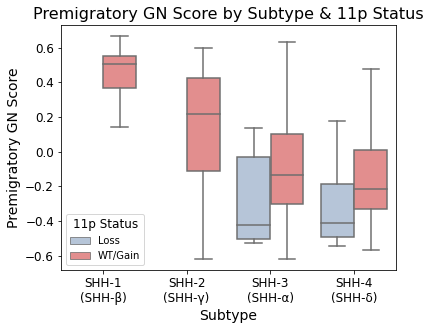

In [30]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='MBEN-Nuc_GN-Premigratory', hue='Real11p',showfliers=False, hue_order=['Loss','WT/Gain'],  order = ss, palette=['lightsteelblue', 'lightcoral'])
ax.set_ylabel("Premigratory GN Score", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Premigratory GN Score by Subtype & 11p Status", fontsize=16)
ax.legend(title='11p Status', loc=3, fontsize=10,  title_fontsize=12)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# plt.savefig("pdf_arial_figures/fig3se-11p.png", dpi=300, bbox_inches='tight')

## Figure 4 Supplement 

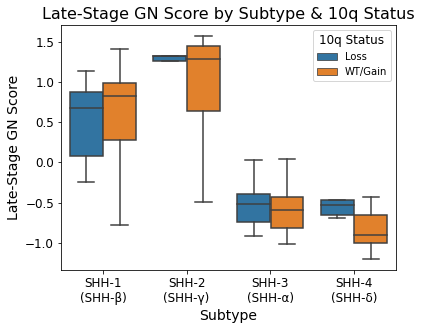

In [31]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='GN-Late', hue='Real10q',showfliers=False, hue_order=['Loss', 'WT/Gain'],  order = ss)
ax.set_ylabel("Late-Stage GN Score", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Late-Stage GN Score by Subtype & 10q Status", fontsize=16)
ax.legend(title='10q Status', loc=1, fontsize=10,  title_fontsize=12)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.savefig("pdf_arial_figures/fig3sa-10q.pdf", dpi=300, bbox_inches='tight')

#### 22Q and GN Late

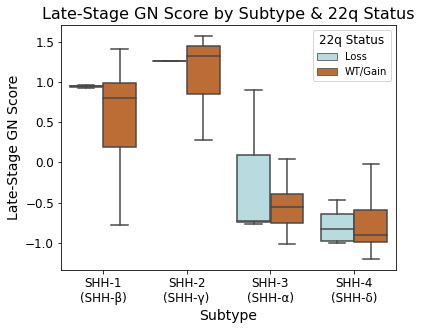

In [32]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='GN-Late', hue='Real22q',showfliers=False, hue_order=['Loss', 'WT/Gain'],  order = ss,palette=  ['powderblue', 'chocolate'])
ax.set_ylabel("Late-Stage GN Score", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Late-Stage GN Score by Subtype & 22q Status", fontsize=16)
ax.legend(title='22q Status', loc=1, fontsize=10,  title_fontsize=12)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.savefig("pdf_arial_figures/fig3sb-22q.pdf", dpi=300, bbox_inches='tight')

#### 9q and premigratory GN

(-0.7, 0.9)

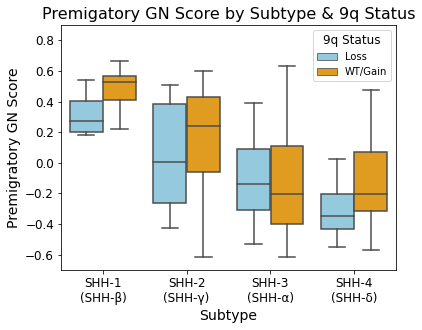

In [33]:
fig,ax = plt.subplots(figsize=(6,4.5))
sns.boxplot(data=roo, x='FullSubtype', y='MBEN-Nuc_GN-Premigratory', hue='Real9q',showfliers=False, hue_order=['Loss', 'WT/Gain'],  order = ss, palette = ['skyblue', 'orange'])
ax.set_ylabel("Premigratory GN Score", fontsize=14)
ax.set_xlabel("Subtype", fontsize=14)
ax.set_title("Premigatory GN Score by Subtype & 9q Status", fontsize=16)
ax.legend(title='9q Status', loc=1, fontsize=10,  title_fontsize=12)
max_width = 7
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-0.7, 0.9)
# plt.savefig("pdf_arial_figures/fig3sc-9q.pdf", dpi=300, bbox_inches='tight')